## 신경망 학습

## 단순한 신경망 구현: Logic Gate

### 필요한 모듈 import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\coding\AppData\Local\Temp\ipykernel_27308\1334896370.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### 하이퍼 파라미터(Hyper Parameter)

In [4]:
epochs = 1000
lr = 0.1#learning rate

### 유틸 함수들(Utill Function)

In [30]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def mean_squared_error(pred_y, true_y):
    return np.mean(np.sum(np.square(true_y-pred_y)))

def cross_entropy_error(pred_y, true_y):
    if true_y.dim == 1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y, true_y):
    if true_y.dim == 1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y, true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def differential(f,x):
    eps = 1e-5
    diff_value = np.zeros_like(x)
    
    for i in range(x.shape[0]):
        temp_val = x[i]
        
        x[i] = temp_val + eps
        f_h1 = f(x)
        
        x[i] = temp_val - eps
        f_h2 = f(x)
        
        diff_value[i] = (f_h1 - f_h2) / (2*eps)
        x[i] = temp_val
        
    return diff_value

### 신경망

In [6]:
class LogicGateNet():
    
    def __init__(self):
        def weight_init():
            np.random.seed(1)
            weights = np.random.randn(2)
            bias = np.random.rand(1)
            
            return weights, bias
        
        self.weights, self.bias = weight_init()
    
    def predict(self,x):
        W = self.weights.reshape(-1,1)
        b = self.bias
        
        pred_y = sigmoid(np.dot(x,W) + b)
        return pred_y
    
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
    
    def get_gradient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
        
        grad_W = differential(loss_grad, self.weights)
        grad_B = differential(loss_grad, self.bias)
        
        return grad_W, grad_B

### AND Gate

### 모델 생성 및 학습

In [7]:
AND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = AND.get_gradient(X,Y)
    
    AND.weights -= lr*grad_W
    AND.bias -= lr*grad_B
    
    loss = AND.loss(X,Y)
    train_loss_list.append(loss)
    
    if i % 100 == 99 :
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, AND.weights, AND.bias))

Epoch: 100, Cost: 0.6886489498071491, Weights: [1.56426876 0.79168393], Bias: [-2.14871589]
Epoch: 200, Cost: 0.4946368603064415, Weights: [2.01360719 1.71241131], Bias: [-3.07894028]
Epoch: 300, Cost: 0.3920165980757418, Weights: [2.42841657 2.29753793], Bias: [-3.79103207]
Epoch: 400, Cost: 0.3257214374791936, Weights: [2.794852   2.73235738], Bias: [-4.37257095]
Epoch: 500, Cost: 0.27863601334755067, Weights: [3.11636193 3.08408364], Bias: [-4.86571237]
Epoch: 600, Cost: 0.24328504683831248, Weights: [3.40015395 3.38235762], Bias: [-5.29433736]
Epoch: 700, Cost: 0.21572536552468008, Weights: [3.65300561 3.64264217], Bias: [-5.67349792]
Epoch: 800, Cost: 0.19363244428365756, Weights: [3.88044124 3.87412053], Bias: [-6.01340133]
Epoch: 900, Cost: 0.1755321312790001, Weights: [4.08680123 4.08279091], Bias: [-6.32133891]
Epoch: 1000, Cost: 0.1604392693330146, Weights: [4.27548114 4.27284863], Bias: [-6.6027234]


### 테스트

In [8]:
print(AND.predict(X))

[[0.00135483]
 [0.08867878]
 [0.08889176]
 [0.87496677]]


### OR Gate

### 모델 생성 및 학습

In [9]:
OR = LogicGateNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_2 = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = OR.get_gradient(X,Y_2)
    
    OR.weights -= lr * grad_W
    OR.bias -= lr * grad_B
    
    loss = OR.loss(X,Y_2)
    train_loss_list.append(loss)
    
    if i % 100 ==99:
         print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, OR.weights, OR.bias))

Epoch: 100, Cost: 0.49580923848195635, Weights: [2.45484353 1.40566594], Bias: [-0.14439625]
Epoch: 200, Cost: 0.3398674231515118, Weights: [2.98631846 2.39448393], Bias: [-0.67661178]
Epoch: 300, Cost: 0.2573360986187996, Weights: [3.45016595 3.08431266], Bias: [-1.03721585]
Epoch: 400, Cost: 0.20630142190075948, Weights: [3.85230067 3.60865952], Bias: [-1.30598633]
Epoch: 500, Cost: 0.1716549922113493, Weights: [4.20195872 4.03000824], Bias: [-1.52060015]
Epoch: 600, Cost: 0.1466501884550824, Weights: [4.50867681 4.38171478], Bias: [-1.6994397]
Epoch: 700, Cost: 0.12779768649454676, Weights: [4.78049264 4.68334611], Bias: [-1.8527641]
Epoch: 800, Cost: 0.11310517185413338, Weights: [5.0237707 4.9472786], Bias: [-1.98691756]
Epoch: 900, Cost: 0.10135180918376233, Weights: [5.24347159 5.18181684], Bias: [-2.10611973]
Epoch: 1000, Cost: 0.09174843008614178, Weights: [5.44346811 5.39279833], Bias: [-2.21332947]


### 테스트

In [10]:
print(OR.predict(X))

[[0.09855987]
 [0.9600543 ]
 [0.96195283]
 [0.9998201 ]]


### NAND Gate

In [11]:
NAND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_3 = np.array([[1],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = NAND.get_gradient(X,Y_3)
    
    NAND.weights -= lr*grad_W
    NAND.bias -= lr*grad_B
    
    loss = NAND.loss(X,Y_3)
    train_loss_list.append(loss)
    
    if i % 100 == 99 :
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, NAND.weights, NAND.bias))

Epoch: 100, Cost: 0.7911738653769252, Weights: [-0.48972722 -1.25798774], Bias: [1.74566135]
Epoch: 200, Cost: 0.5430490957885361, Weights: [-1.51545093 -1.80261804], Bias: [2.79151756]
Epoch: 300, Cost: 0.4212591302740578, Weights: [-2.14614496 -2.26642639], Bias: [3.56506179]
Epoch: 400, Cost: 0.3456117101527486, Weights: [-2.607325   -2.66303355], Bias: [4.18521187]
Epoch: 500, Cost: 0.2931298605179329, Weights: [-2.97696333 -3.00501941], Bias: [4.70528682]
Epoch: 600, Cost: 0.2543396786002071, Weights: [-3.28850585 -3.30365261], Bias: [5.1539571]
Epoch: 700, Cost: 0.22443918596775067, Weights: [-3.55912171 -3.56778782], Bias: [5.54869527]
Epoch: 800, Cost: 0.20067626330853877, Weights: [-3.7989077  -3.80411461], Bias: [5.90108417]
Epoch: 900, Cost: 0.18134125517637367, Weights: [-4.01441395 -4.01767547], Bias: [6.21926514]
Epoch: 1000, Cost: 0.1653094408173465, Weights: [-4.21019696 -4.21231432], Bias: [6.50920952]


### 테스트

In [12]:
print(NAND.predict(X))

[[0.99851256]
 [0.90861957]
 [0.90879523]
 [0.12861037]]


### XOR Gate

In [13]:
XOR = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_4 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = XOR.get_gradient(X,Y_4)
    
    XOR.weights -= lr*grad_W
    XOR.bias -= lr*grad_B
    
    loss = XOR.loss(X,Y_4)
    train_loss_list.append(loss)
    
    if i % 100 == 99 :
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, XOR.weights, XOR.bias))

Epoch: 100, Cost: 1.4026852245456056, Weights: [ 0.47012771 -0.19931523], Bias: [-0.16097708]
Epoch: 200, Cost: 1.3879445622848308, Weights: [ 0.1572739  -0.03387161], Bias: [-0.07321056]
Epoch: 300, Cost: 1.386492030048381, Weights: [0.05525161 0.00089673], Bias: [-0.03330094]
Epoch: 400, Cost: 1.3863236205351948, Weights: [0.02049628 0.00504503], Bias: [-0.01514784]
Epoch: 500, Cost: 1.3862994743646844, Weights: [0.0080051  0.00361297], Bias: [-0.00689034]
Epoch: 600, Cost: 1.3862953430687464, Weights: [0.00326661 0.00201812], Bias: [-0.00313421]
Epoch: 700, Cost: 1.3862945581495083, Weights: [0.00137938 0.00102449], Bias: [-0.00142566]
Epoch: 800, Cost: 1.38629440139037, Weights: [0.00059716 0.00049628], Bias: [-0.00064849]
Epoch: 900, Cost: 1.3862943694120307, Weights: [0.00026303 0.00023435], Bias: [-0.00029498]
Epoch: 1000, Cost: 1.386294362832352, Weights: [0.0001172  0.00010905], Bias: [-0.00013418]


### 테스트

In [14]:
print(XOR.predict(X))

[[0.49996646]
 [0.49999372]
 [0.49999575]
 [0.50002302]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [15]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1, s2]).T.reshape(-1,2)

### 테스트

In [16]:
print(AND.predict(X_2))

[[0.12870357]
 [0.79966936]
 [0.80108545]
 [0.14420781]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [17]:
class XORNet():
    
    def __init__(self):
        np.random.seed(1)
        
        def weight_init():
            params = {}
            params['w_1'] = np.random.randn(2)
            params['b_1'] = np.random.rand(2)
            params['w_2'] = np.random.randn (2)
            params['b_2'] = np.random.rand(1)
            return params
        
        self.params = weight_init()
        
    def predict(self, x):
        W_1, W_2 = self.params['w_1'].reshape(-1,1), self.params['w_2'].reshape(-1,1)
        B_1, B_2 = self.params['b_1'], self.params['b_2']
        
        A1 = np.dot(x, W_1) + B_1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1, W_2) + B_2
        pred_y = sigmoid(A2)
        
        return pred_y
    
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
    
    def get_gradient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
        
        grads = {}
        grads['w_1'] = differential(loss_grad, self.params['w_1'])
        grads['b_1'] = differential(loss_grad, self.params['b_1'])
        grads['w_2'] = differential(loss_grad, self.params['w_2'])
        grads['b_2'] = differential(loss_grad, self.params['b_2'])
        
        return grads

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [18]:
lr = 0.3

### 모델 생성 및 학습

In [19]:
XOR = XORNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grads = XOR.get_gradient(X,Y_5)
    
    for key in ('w_1', 'b_1', 'w_2', 'b_2'):
        XOR.params[key] -= lr * grads[key]
        
    loss = XOR.loss(X,Y_5)
    train_loss_list.append(loss)
    
    if i % 100 == 99:
        print('Epoch: {}, Cost: {}'.format(i+1,loss))

Epoch: 100, Cost: 1.3535614442470036
Epoch: 200, Cost: 1.2827154568316697
Epoch: 300, Cost: 0.8968907892186366
Epoch: 400, Cost: 0.33871971411928997
Epoch: 500, Cost: 0.18121344476191775
Epoch: 600, Cost: 0.11991186457358068
Epoch: 700, Cost: 0.08861936864741338
Epoch: 800, Cost: 0.06992180653088811
Epoch: 900, Cost: 0.0575804135303371
Epoch: 1000, Cost: 0.04886093568413276


### 테스트

In [20]:
print(XOR.predict(X))

[[0.0217367 ]
 [0.96884394]
 [0.97816819]
 [0.0217794 ]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [22]:
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test, y_test) = mnist.load_data()

### 데이터 확인

In [23]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


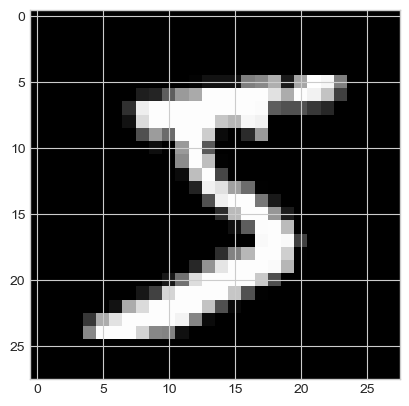

In [24]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [25]:
y_train[0]

5

In [26]:
y_test[0]

7

### 데이터 전처리(Data Preprocessing)

In [27]:
def flatten_for_mnist(x):
    temp = np.zeros((x.shape[0],x[0].size))
    
    for idx, data in enumerate(x):
        temp[idx, :] = data.flatten()
        
    return temp

In [1]:
'''
x_train, x_test = x_train/255.0, x_test/255.0

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train,depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)
'''

'\nx_train, x_test = x_train/255.0, x_test/255.0\n\nx_train = flatten_for_mnist(x_train)\nx_test = flatten_for_mnist(x_test)\n\nprint(x_train.shape)\nprint(x_test.shape)\n\ny_train_ohe = tf.one_hot(y_train,depth=10).numpy()\ny_test_ohe = tf.one_hot(y_test, depth=10).numpy()\n\nprint(y_train_ohe.shape)\nprint(y_test_ohe.shape)\n'

In [29]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

255 0


NameError: name 'y_train_ohe' is not defined

#### 하이퍼 파라미터(Hyper Parameter)